# Quidditch League Player Prediction
##### by
#### Hardik Jivani (haj272) and Virendra Singh Rajpurohit (vsr266)


For this project, we utilized two datasets, namely:

1. qudditch_training.csv.csv
2. qudditch_test.csv

The initial dataset was already randomly divided into the training and the validation set respectively. Our job is to predict the output for all the observations in the validation set. Our prediction will then be compared against the actual output. Test dataset was later used to predict the quidditch_league_player. 

# Import Library and Dataset

In [3]:
import numpy
import sklearn
# So On.......
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce


In [4]:

missing_values = ["n/a", "na", "--","?"]
column_names = ['id_num', 'player_id', 'house', 'gender', 'age', 'weight', 'foul_type_id', 'game_move_id', 'penalty_id', 'game_duration', 'player_code', 'move_specialty', 'num_game_moves', 'num_game_losses', 'num_practice_sessions', 'num_games_satout', 'num_games_injured', 'num_games_notpartof', 'player_type', 'num_games_won', 'snitchnip', 'stooging', 'body_blow', 'checking', 'dopplebeater_defence', 'hawkshead_attacking_formation', 'no_hands_tackle', 'power_play', 'sloth_grip_roll', 'spiral_dive', 'starfish_and_stick', 'twirl', 'wronski_feint', 'zig-zag', 'bludger_backbeat', 'chelmondiston_charge', 'dionysus_dive', 'double_eight_loop', 'finbourgh_flick', 'reverse_pass', 'parkins_pincer', 'plumpton_pass', 'porskoff_ploy', 'transylvanian_tackle', 'woollongong_shimmy', 'change', 'snitch_caught', 'quidditch_league_player']
df_train = pd.read_csv('qudditch_training.csv', delimiter=",", na_values = missing_values)
df_test=pd.read_csv('qudditch_test.csv', delimiter=",", na_values=missing_values)


C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


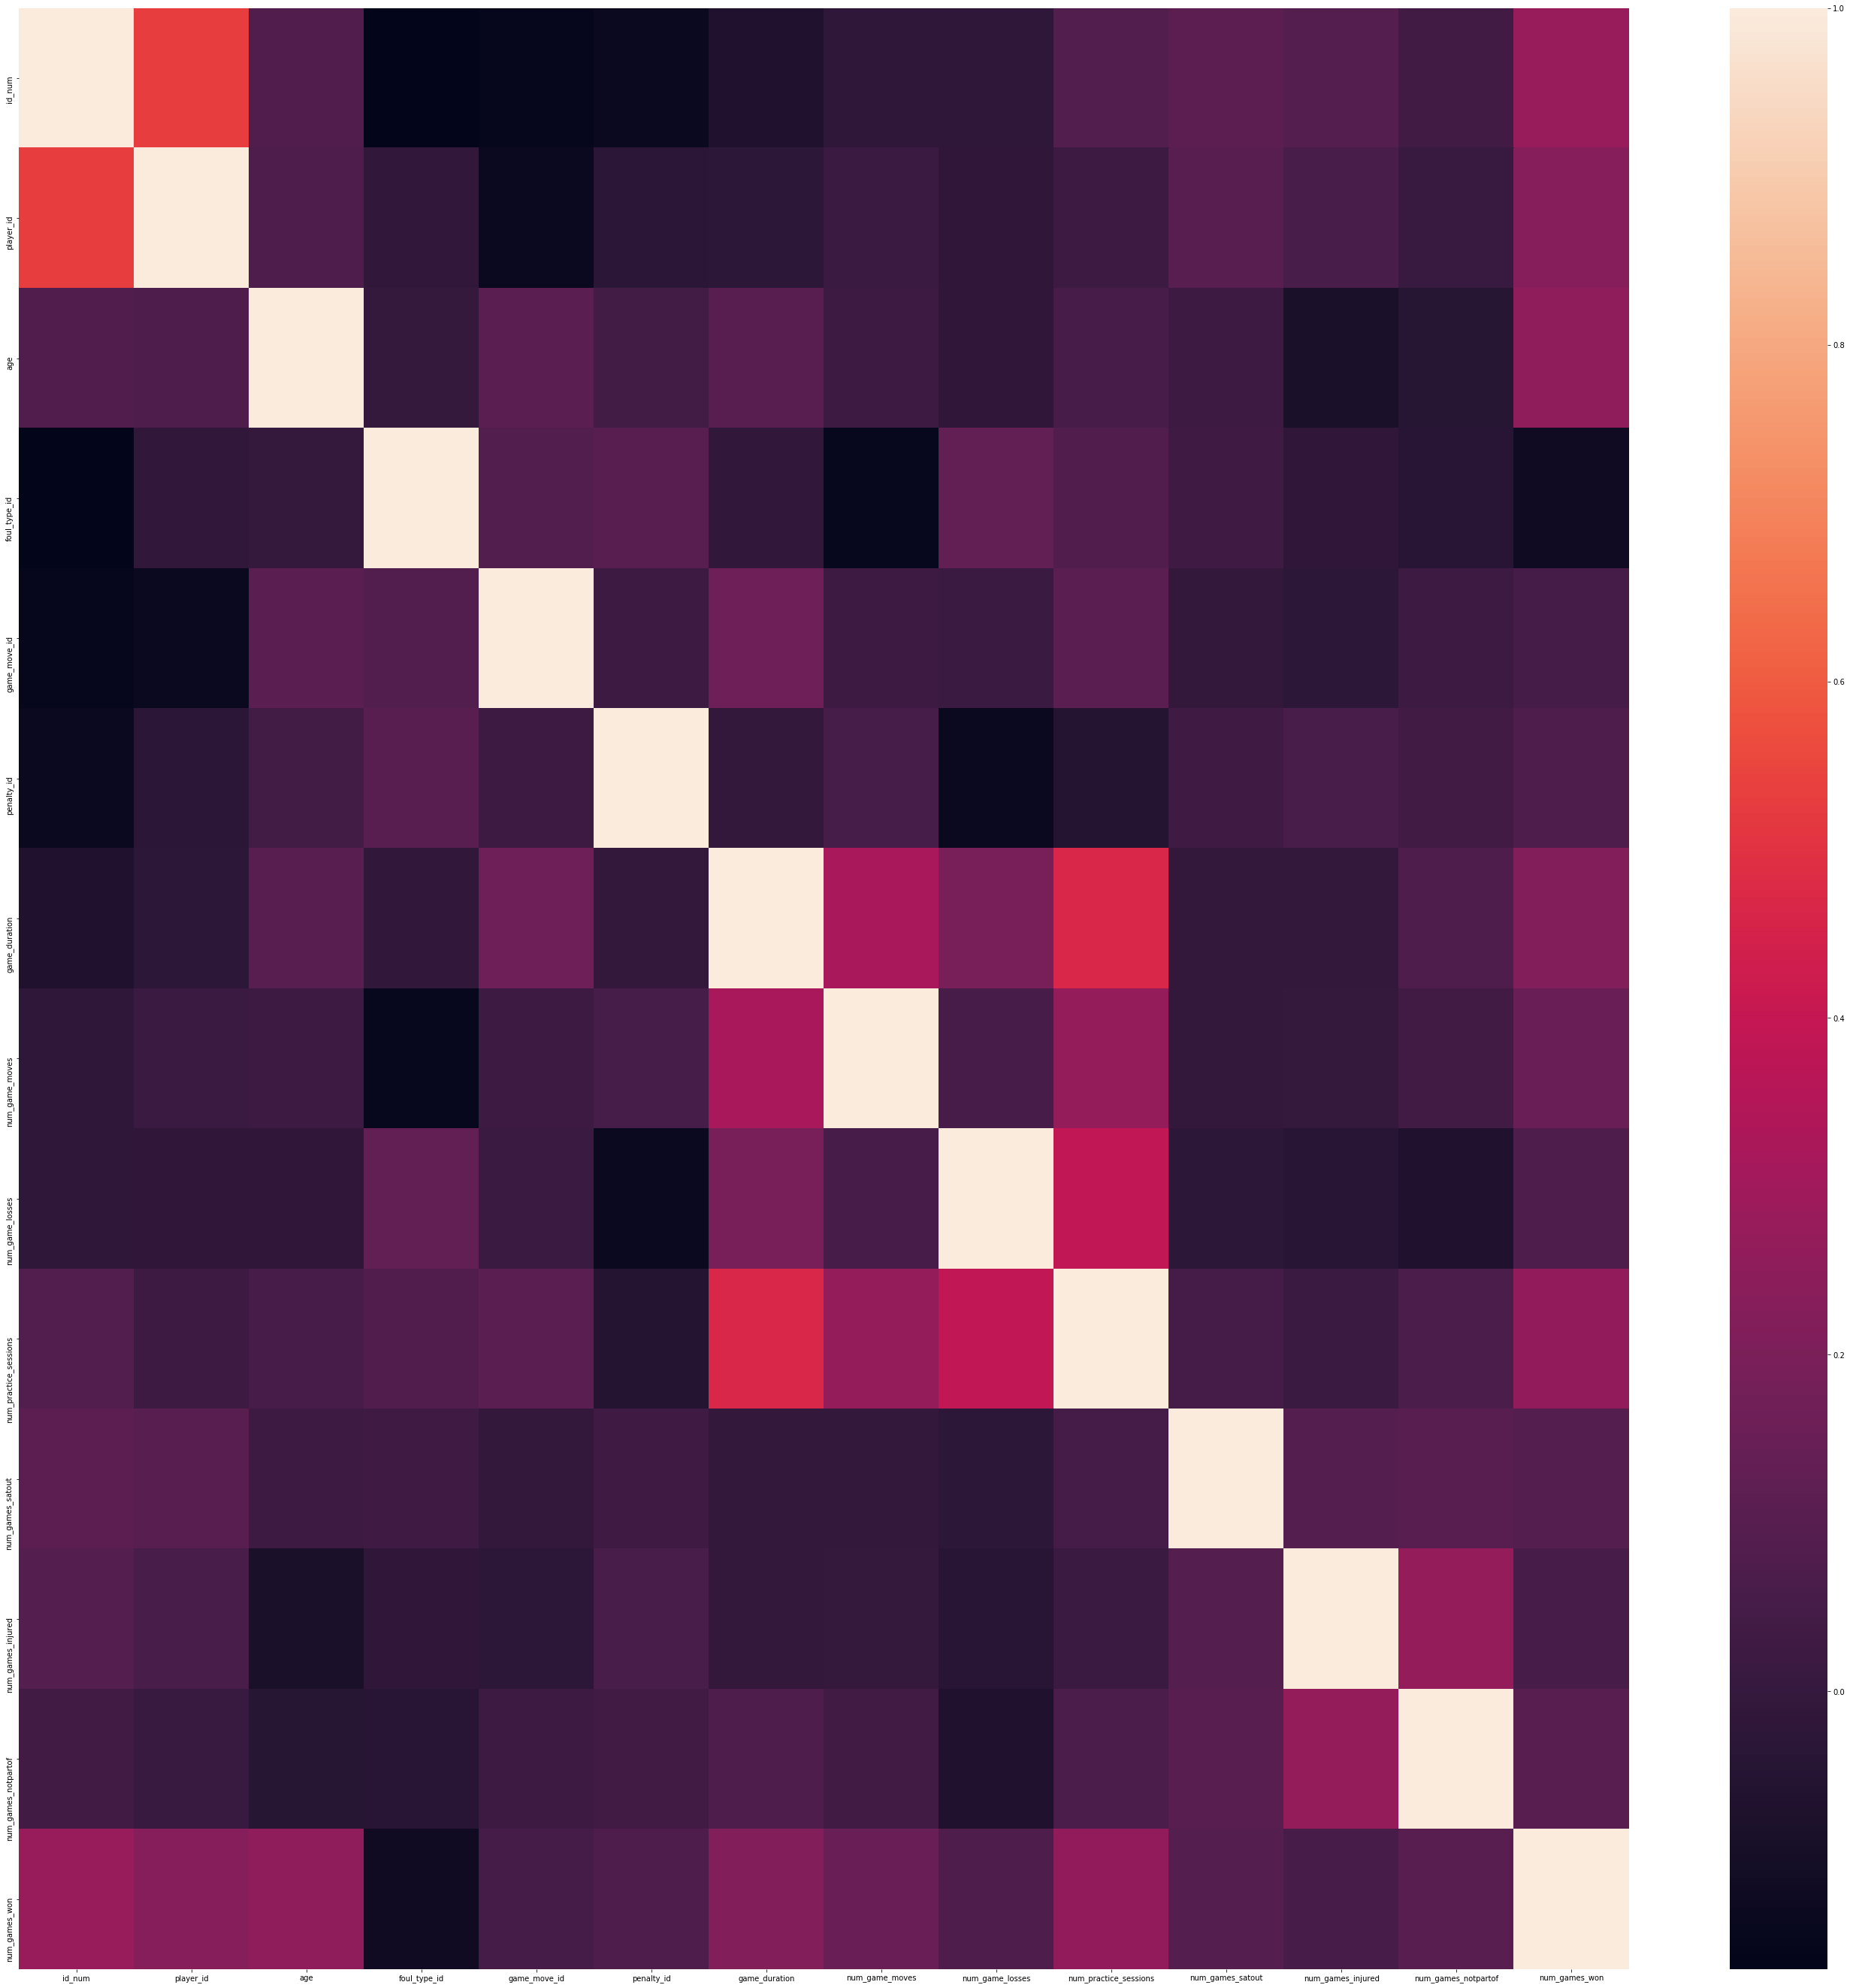

In [5]:
corr_matrix = df_train.corr()
plt.subplots(figsize=(48,48))
sns.heatmap(corr_matrix)
plt.savefig('output.png')

# PART I: Preprocessing

#### Feature Reduction or extraction. (If ANY)

In [6]:
#Code...
df_train = df_train.drop(['double_eight_loop','finbourgh_flick'],axis=1)
df_test = df_test.drop(['double_eight_loop','finbourgh_flick'],axis=1)

Feature Reduction of tactics

In [7]:

tactics = ['body_blow', 'checking', 'dopplebeater_defence', 'hawkshead_attacking_formation', 'no_hands_tackle', 'power_play', 'sloth_grip_roll', 'spiral_dive', 'starfish_and_stick', 'twirl', 'wronski_feint', 'zig-zag', 'bludger_backbeat', 'chelmondiston_charge', 'dionysus_dive', 'reverse_pass', 'parkins_pincer', 'plumpton_pass', 'porskoff_ploy', 'transylvanian_tackle', 'woollongong_shimmy']
changes = ["No","Steady","Up","Down"]
n = []
s= []
u = []
d = []
for i in range(0,len(df_train['house'])):
    no = st = up = dn = 0
    for j in tactics:
        if df_train[j][i] == "No":
            no+=1
        elif df_train[j][i] == "Steady":
            st+=1
        elif df_train[j][i] == "Up":
            up+=1
        elif df_train[j][i] == "Down":
            dn+=1
    n.append(no)
    s.append(st)
    u.append(up)
    d.append(dn)
se = pd.Series(n)
df_train['No'] = se.values
se = pd.Series(s)
df_train['Steady'] = se.values
se = pd.Series(u)
df_train['Up'] = se.values
se = pd.Series(d)
df_train['Down'] = se.values
df_train = df_train.drop(tactics,axis=1)

In [8]:

tactics = ['body_blow', 'checking', 'dopplebeater_defence', 'hawkshead_attacking_formation', 'no_hands_tackle', 'power_play', 'sloth_grip_roll', 'spiral_dive', 'starfish_and_stick', 'twirl', 'wronski_feint', 'zig-zag', 'bludger_backbeat', 'chelmondiston_charge', 'dionysus_dive', 'reverse_pass', 'parkins_pincer', 'plumpton_pass', 'porskoff_ploy', 'transylvanian_tackle', 'woollongong_shimmy']
changes = ["No","Steady","Up","Down"]
n = []
s= []
u = []
d = []
for i in range(0,len(df_test['house'])):
    no = st = up = dn = 0
    for j in tactics:
        if df_test[j][i] == "No":
            no+=1
        elif df_test[j][i] == "Steady":
            st+=1
        elif df_test[j][i] == "Up":
            up+=1
        elif df_test[j][i] == "Down":
            dn+=1
    n.append(no)
    s.append(st)
    u.append(up)
    d.append(dn)
se = pd.Series(n)
df_test['No'] = se.values
se = pd.Series(s)
df_test['Steady'] = se.values
se = pd.Series(u)
df_test['Up'] = se.values
se = pd.Series(d)
df_test['Down'] = se.values
df_test = df_test.drop(tactics,axis=1)

Removal of Outliers

In [9]:
rest = ['age','num_game_moves','num_game_losses','game_duration','num_practice_sessions','num_games_notpartof','num_games_won','No','Steady','Up','Down']
threshold = 3
outlier_dict={}
for i in rest:
    outlier=[]
    mean = np.mean(df_train[i])
    std = np.std(df_train[i])
    
    for y in df_train[i]:
        z_score = (y-mean)/std
        if np.abs(z_score) > threshold:
            outlier.append(y)
    output = []
    for x in outlier:
        if x not in output:
            output.append(x)
    outlier_dict[i]=output
for i in outlier_dict.keys():
    for j in outlier_dict[i]:
        ind =df_train[df_train[i]==j].index
        df_train=df_train.drop(ind)


Join Train and test data for preprocessing

In [10]:
df_train_y=df_train['quidditch_league_player']
df_train_x = df_train.drop(['quidditch_league_player'],axis=1)
df=df_train_x.append(df_test, ignore_index=True)

#### Handling missing values. (If ANY)

In [11]:

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='constant', fill_value='Other')
df['house'] = si.fit_transform(df[['house']])

In [12]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')
df['player_code'] = si.fit_transform(df[['player_code']])
df['move_specialty'] = si.fit_transform(df[['move_specialty']])

In [13]:
df = df.drop(['weight','id_num','player_id'],axis=1)

Feature Reduction and Category reduction

In [14]:
df['num_games_notpartof'] = df['num_games_notpartof']+df['num_games_injured']+df['num_games_satout']
df = df.drop(['num_games_satout','num_games_injured'],axis=1)


In [15]:
df['snitchnip'] = df['snitchnip'].replace('>300','High')
df['snitchnip'] = df['snitchnip'].replace('>200','High')

In [16]:
df['stooging'] = df['stooging'].replace('>7','High')
df['stooging'] = df['stooging'].replace('>8','High')

#### Feature Datatype Conversion From Numeric to categoric and Vice-versa. (If ANY)

In [17]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
print(char_cols)

label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])

Index(['house', 'gender', 'player_code', 'move_specialty', 'player_type',
       'snitchnip', 'stooging', 'change', 'snitch_caught'],
      dtype='object')


In [18]:
id_mapping = {}
ids = ['foul_type_id','game_move_id','penalty_id']
for c in ids:
    df[c], id_mapping[c] = pd.factorize(df[c])

Binary Encoding for label_mapping and id_mapping

In [19]:
for i in char_cols:
    if df[i].nunique()>2:
        encoder = ce.BinaryEncoder(cols=[i])
        df = encoder.fit_transform(df)

In [20]:
for i in ids:
    if df[i].nunique()>2:
        encoder = ce.BinaryEncoder(cols=[i])
        df = encoder.fit_transform(df)

#### Remove features with one unique value

In [21]:
for i in df.columns:
    if df[i].nunique() ==1:
        df = df.drop([i],axis=1)

# scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc = StandardScaler(copy=True, with_mean=True, with_std=True)
scale_features = ['age','num_game_moves','num_game_losses','game_duration','num_practice_sessions','num_games_notpartof','num_games_won','No','Steady','Up','Down']


#### Separate out quidditch_train data and quidditch_test data for applying to the model

In [23]:
x_train=df.iloc[:94029,:]
print(x_train.shape)
x_test=df.iloc[94029:,:]
print(x_test.shape)

encoder = ce.BinaryEncoder(cols=['quidditch_league_player'])
df_train['quidditch_league_player'] = encoder.fit_transform(df_train['quidditch_league_player'])
y_train= df_train['quidditch_league_player']

(94029, 52)
(500, 52)


In [24]:
y_train = y_train.reset_index(drop=True)

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [26]:
y = y_train
x = x_train
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size= 0.25, random_state=27)

In [27]:
sc.fit(train_x[scale_features])
train_x[scale_features] = sc.transform(train_x[scale_features])
test_x[scale_features] = sc.transform(test_x[scale_features])

C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

# PART II: Classification

In [28]:
def confusion_mat(a,b):
    tn = tp = fn = fp =0
    for i,j in zip(test_y,y_pred):
        if i==j and i==0:
            tn+=1
        elif i==j and i==1:
            tp+=1
        elif i!=j and i==0:
            fp+=1
        else:
            fn+=1
    print("True Negative:",tn)
    print("True Positive:",tp)
    print("False Positive:",fp)
    print("False Negative:",fn)

### Model 1:
Model Name: Logistic Regression with SMOTE<br>
Evaluation method and metric used Name: Classification_report(F1-score,precision,recall)<br>
Name of the Hyperparameter used: <br>
1. Inverse of Regularization Strength<br>
2. Sampling Strategy for SMOTE<br>

In [29]:
#Code...
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score,f1_score,recall_score,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,recall_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [30]:
# c_space = np.logspace(-5, 8,5)
# print(c_space)
#C=[1.00000000e-05, 1.77827941e-02, 3.16227766e+01, 5.62341325e+04, 1.00000000e+08]
# param_grid = {'C': 1.00000000e-05}
# logreg = LogisticRegression(solver='lbfgs',max_iter=10000)

# # Instantiate the GridSearchCV object: logreg_cv
# logreg_cv = GridSearchCV(logreg,{'C': [1.00000000e+08]}, cv=5)

# # Fit it to the data
# logreg_cv.fit(train_x, train_y)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
# print("Best score is {}".format(logreg_cv.best_score_))
# print("Best score is {}".format(logreg_cv.best_estimator_))
# y_pred = logreg_cv.predict(test_x)

# probs = logreg_cv.predict_proba(test_x)
# print(accuracy_score(test_y, y_pred))
# print(classification_report(test_y, y_pred))
# print(f1_score(test_y,y_pred))
# print(recall_score(test_y,y_pred))

In [43]:
sm = SMOTE(random_state=23,sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(train_x, train_y)
logreg = LogisticRegression(C=0.01, solver='lbfgs',max_iter=10000)
logreg.fit(X_res,y_res)
y_pred = logreg.predict(test_x)
print("Accuracy : ",accuracy_score(test_y,y_pred))
print(classification_report(test_y, y_pred))
confusion_mat(test_y, y_pred)

Accuracy :  0.756295729113
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     20960
           1       0.16      0.31      0.21      2548

   micro avg       0.76      0.76      0.76     23508
   macro avg       0.53      0.56      0.53     23508
weighted avg       0.83      0.76      0.79     23508

True Negative: 17001
True Positive: 778
False Positive: 3959
False Negative: 1770


### Model 2:
Model Name: DecisionTreeClassifier<br>
Evaluation method and metric used Name: Classification_report(F1-score,precision,recall)<br>
Name of the Hyperparameter used:<br>
1. Max_features of Decision Tree<br>
2. Sampling Strategy of SMOTE

In [44]:
from sklearn import tree
from sklearn.metrics import classification_report

In [45]:
# clf = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
#             max_features=, max_leaf_nodes=None, min_impurity_decrease=0.0,
#             min_impurity_split=None, min_samples_leaf=7,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             presort=False, random_state=None, splitter='best')

In [46]:
clf = tree.DecisionTreeClassifier(max_features=52)
sm = SMOTE(random_state=27,sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(train_x, train_y)
clf.fit(X_res,y_res)
y_pred = clf.predict(test_x)
print("Accuracy : ",accuracy_score(test_y,y_pred))
print(classification_report(test_y, y_pred))
confusion_mat(test_y, y_pred)

Accuracy :  0.794750723158
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     20960
           1       0.14      0.17      0.15      2548

   micro avg       0.79      0.79      0.79     23508
   macro avg       0.52      0.52      0.52     23508
weighted avg       0.81      0.79      0.80     23508

True Negative: 18242
True Positive: 441
False Positive: 2718
False Negative: 2107


### Model 3:
Model Name: Multi-Layer Perceptron Classifier with SMOTE<br>
Evaluation method and metric used Name: Classification_report(F1-score,precision,recall)<br>
Name of the Hyperparameter used:<br>
1. Sampling Strategy with SMOTE<br>
2. Hidden_layer_sizes


In [47]:
clf = MLPClassifier(hidden_layer_sizes=(120,120,120), max_iter=100000, alpha=0.5,learning_rate_init = 0.15,activation = 'tanh',
                     solver='sgd',  random_state=31,tol=0.1,learning_rate='adaptive')
sm = SMOTE(random_state=27,sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(train_x, train_y)
clf.fit(X_res,y_res)
y_pred = clf.predict(test_x)
print("Accuracy : ",accuracy_score(test_y,y_pred))
print(classification_report(test_y, y_pred))
confusion_mat(test_y, y_pred)

Accuracy :  0.742300493449
              precision    recall  f1-score   support

           0       0.91      0.79      0.85     20960
           1       0.17      0.35      0.23      2548

   micro avg       0.74      0.74      0.74     23508
   macro avg       0.54      0.57      0.54     23508
weighted avg       0.83      0.74      0.78     23508

True Negative: 16559
True Positive: 891
False Positive: 4401
False Negative: 1657


# PART III: Best Hypothesis:
Model Name: Logistic Regression with SMOTE<br>
Reason: With the same F1-score as MLP, logistic regression has a better recall and predicts more accurately.<br>
Hyper-parameter Value: Sampling Strategy with SMOTE = 0.75<br>


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
y = y_train
x = x_train

In [39]:
sc.fit(x[scale_features])
x[scale_features] = sc.transform(x[scale_features])
x_test[scale_features] = sc.transform(x_test[scale_features])

C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hardi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [40]:
sm = SMOTE(random_state=23,sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(x, y_train)
logreg = LogisticRegression(C=0.01, solver='lbfgs',max_iter=1000000)
logreg.fit(X_res,y_res)
y_pred = logreg.predict(x_test)

In [42]:
import csv
file = open('test_outputs.csv', 'w')
writer = csv.writer(file)
writer.writerow(['Id_num','qudditch_league_player'])
for i in range(len(y_pred)):
    if y_pred[i]==0:
        yp="NO"
    else:
        yp="YES"
    writer.writerow([df_test['id_num'][i],yp])
file.close()